## Прогноз оттока клиентов для Оператора связи «Ниединогоразрыва.ком»

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Расшифровка колонок

    customerID - уникальный номер клиента;

contract.csv:
    
    BeginDate – дата начала пользования услугами,
    EndDate – дата окончания пользования услугами,
    Type – тип оплаты: ежемесячный, годовой и тд,
    PaperlessBilling – электронный документ об оплате,
    PaymentMethod – способ оплаты,
    MonthlyCharges – ежемесячные траты на услуги,
    TotalCharges – всего потрачено денег на услуги

personal.csv:

    gender - пол
    Senior Citizen – наличие пенсионного статуса по возрасту 
    Partner – наличие супруга(и)
    Dependents – наличие иждивенцев 

phone.csv:

    MultipleLines – наличие возможности ведения параллельных линий во время звонка

internet.csv (подключение услуг - yes/no):

    InternetService - тип подключения интернета,
    OnlineSecurity - блокировка небезопасных сайтов,
    OnlineBackup - облако для хранения файлов,
    DeviceProtection - антивирус,
    TechSupport - выделенная линия тех.поддержки,
    StreamingTV - стриминг-tv,
    StreamingMovies - стриминг-кино. 



## План выполнения данного проекта:

1. Подготовка к проекту (загрузка библиотек, загрузка данных и проверка файлов, что они открываются без проблем).

2. Исследование данных (визуальное знакомство с данными и корректность типов данных, знакомство со статистической информацией, проверка на наличие явных дубликатов и пропусков в данных).

3. Проработка данных и подготовка к МО (объединение таблиц, при необходимости смена типов данных, обработка пропусков, подготовка  признаков и добавление новых на основе имеющейся информации [при необходимости], изменение целевого признака на бинарные данные [ушел или не ушел: 1 или 0] и пр.).

4. МО и подбор гиперпараметров (разбивка данных на обучающую и тестовую выборки 75%/25%, обучение моделей, подбор гиперпараметров для лучшего результата на основе оценки метрик roc-auc, выбор лучшей модели, проверка результатов на тестовой выборке).

5. Подготовка отчета, выводов.





## Подготовка к проекту 

Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

pd.set_option('display.max_columns', None)

In [2]:
try:
    con = pd.read_csv('/datasets/final_provider/contract.csv')
    ine = pd.read_csv('/datasets/final_provider/internet.csv')
    per = pd.read_csv('/datasets/final_provider/personal.csv')
    pho = pd.read_csv('/datasets/final_provider/phone.csv')
    
except:
    con = pd.read_csv('/content/contract.csv')
    ine = pd.read_csv('/content/internet.csv')
    per = pd.read_csv('/content/personal.csv')  
    pho = pd.read_csv('/content/phone.csv')

In [3]:
con.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
ine.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [5]:
per.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
pho.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


ВЫВОД: данные загружены и открываются.

## Исследование данных

Краткая статистическая сводка данных

In [7]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
ine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [9]:
per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
pho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [11]:
con.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [12]:
ine.describe(include='all')

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [13]:
per.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [14]:
pho.describe(include='all')

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


Проверка на наличие явных дубликатов

In [15]:
con.duplicated().sum()

0

In [16]:
ine.duplicated().sum()

0

In [17]:
per.duplicated().sum()

0

In [18]:
pho.duplicated().sum()

0

Проверка на наличие пропусков

In [19]:
con.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [20]:
ine.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [21]:
per.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [22]:
pho.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

Вывод: в данных нет явных дубликатов и пропусков, но при объединении таблиц пропуски появятся и необходимо будет их заполнить. Пропуски могут появиться в виду того, что клиенты могут пользоваться не всеми услугами, или просто не проводили оплату, поэтому записи в каких то столбцах о них может отсутствовать, И при объединении могут появиться пропуски. 

У столбца total charges надо будет изменить тип данных на float. Столбец EndDate в таком виде не подходит для работы и его надо будет заменить на бинарный вариант ответа 1/0 (ушел/не ушел).

## Проработка и подготовка данных к МО

Объеденим таблицы по номеру ID:

In [23]:
df = con.merge(per, how='left', on = 'customerID')

In [24]:
df = df.merge(pho, how='left', on = 'customerID')

In [25]:
df = df.merge(ine, how='left', on = 'customerID')

In [26]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


Пропуски показывают что данные услуги у определенных клиентов отсутствуют, поэтому заменим пропуски на No.

In [28]:
df[['MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies']] = df[['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                             'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                             'StreamingTV', 'StreamingMovies']].fillna('No')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [30]:
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [32]:
df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
len(df['customerID'].unique())

7043

Поменяем тип 

In [35]:
df['TotalCharges'].sort_values().head(20)

936            
3826           
4380           
753            
5218           
3331           
6754           
6670           
1340           
488            
1082           
105       100.2
4459     100.25
1723     100.35
2124      100.4
2208      100.8
460       100.9
3883     1001.2
2799     1001.5
5337    1003.05
Name: TotalCharges, dtype: object

In [36]:
df.loc[df['TotalCharges']==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,No,No,No,No,No,No,No,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,No,No,No,No,No,No,No,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


Так как пропущенных данных всего 11 строк и это те клиенты, которые только заключили договор и не успели заплатить за услуги, то я решила их удалить. Не ясно какими в итоге клиентами они станут, поэтому считаю их не информативными. 

Для начала превратим все строки, которые невозможно было преобразовать в числовые значения, в NaN. Потом изменим тип данных и далее уже удалим строки с пропусками.

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [38]:
df['TotalCharges'].sort_values().head(10)

1654    18.80
6489    18.85
1151    18.85
4939    18.90
583     19.00
1733    19.05
3110    19.10
4348    19.10
5336    19.10
367     19.15
Name: TotalCharges, dtype: float64

In [39]:
df['TotalCharges'] = df['TotalCharges'].astype('float32')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float32
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [41]:
df = df.dropna(subset=['TotalCharges'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float32
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  MultipleLines     7032 non-null   object 
 13  InternetService   7032 non-null   object 
 14  OnlineSecurity    7032 non-null   object 
 15  OnlineBackup      7032 non-null   object 
 16  DeviceProtection  7032 non-null   object 


Теперь в данных 7032 строк. Для. проверки запустили команду shape .

Далее заменим целевой признак на бинарный вариант ушел ли клиент или нет.

In [43]:
def TheEnd (left):
    if left == 'No':
        return 0
    if left != 'No':
        return 1
df['TheEnd'] = df['EndDate'].apply(TheEnd)

In [44]:
df['TheEnd'].unique()

array([0, 1])

In [45]:
df.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TheEnd
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.850000,Female,0,Yes,No,No,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.500000,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.150002,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.750000,Male,0,No,No,No,DSL,Yes,No,Yes,Yes,No,No,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.649994,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.500000,Female,0,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,1
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.400024,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,0
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.899994,Female,0,No,No,No,DSL,Yes,No,No,No,No,No,0
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.050049,Female,0,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,1
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.949951,Male,0,No,Yes,No,DSL,Yes,Yes,No,No,No,No,0


Для полноты счастья переведем все столбцы с бинарными ответами Да или Нет к значению 1 или 0 посредством функции выше:

In [46]:
print(df['PaperlessBilling'].unique())

['Yes' 'No']


In [47]:
print(df['Partner'].unique())

['Yes' 'No']


In [48]:
print(df['Dependents'].unique())

['No' 'Yes']


In [49]:
print(df['MultipleLines'].unique())

['No' 'Yes']


In [50]:
print(df['OnlineSecurity'].unique())

['No' 'Yes']


In [51]:
print(df['OnlineBackup'].unique())

['Yes' 'No']


In [52]:
print(df['DeviceProtection'].unique())

['No' 'Yes']


In [53]:
print(df['TechSupport'].unique())

['No' 'Yes']


In [54]:
print(df['StreamingTV'].unique())

['No' 'Yes']


In [55]:
print(df['StreamingMovies'].unique())

['No' 'Yes']


In [56]:
df['PaperlessBilling'] = df['PaperlessBilling'].apply(TheEnd)

In [57]:
df['Partner'] = df['Partner'].apply(TheEnd)

In [58]:
df['Dependents'] = df['Dependents'].apply(TheEnd)

In [59]:
df['MultipleLines'] = df['MultipleLines'].apply(TheEnd)

In [60]:
df['OnlineSecurity'] = df['OnlineSecurity'].apply(TheEnd)

In [61]:
df['OnlineBackup'] = df['OnlineBackup'].apply(TheEnd)

In [62]:
df['DeviceProtection'] = df['DeviceProtection'].apply(TheEnd)

In [63]:
df['TechSupport'] = df['TechSupport'].apply(TheEnd)

In [64]:
df['StreamingTV'] = df['StreamingTV'].apply(TheEnd)

In [65]:
df['StreamingMovies'] = df['StreamingMovies'].apply(TheEnd)

Посмотрим результаты преобразования:

In [66]:
print(df['PaperlessBilling'].unique())

[1 0]


In [67]:
print(df['Partner'].unique())

[1 0]


In [68]:
print(df['Dependents'].unique())

[0 1]


In [69]:
print(df['MultipleLines'].unique())

[0 1]


In [70]:
print(df['OnlineSecurity'].unique())

[0 1]


In [71]:
print(df['OnlineBackup'].unique())

[1 0]


In [72]:
print(df['DeviceProtection'].unique())

[0 1]


In [73]:
print(df['TechSupport'].unique())

[0 1]


In [74]:
print(df['StreamingTV'].unique())

[0 1]


In [75]:
print(df['StreamingMovies'].unique())

[0 1]


In [76]:
#for j in df:
    #print(df[j].unique()) 

На данном эпате все бинарные значения преобразованы, далее добавим колонку, которая нам покажет сколько врмени клиент пользуется или пользовался услугами данной компании. Посмотрим какие клиенты чаще уходят: те, кто давно польтуется услугами или новички. Для начала поменяем тип данных у дат.

Начнем с даты подписания контракта:

In [77]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format="%Y-%m-%d")

Далее в столбце с датой окончания заменим ответы "No" на дату "2020-02-01", что быы потом у столбца поменять тип данных и в итоге посчитать время пользования услугами.

In [78]:
df.loc[df['EndDate'] == 'No', 'EndDate'] = '2020-02-01'

In [79]:
df['EndDate'] = pd.to_datetime(df['EndDate'], format="%Y-%m-%d")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float32       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   int64         
 11  Dependents        7032 non-null   int64         
 12  MultipleLines     7032 non-null   int64         
 13  InternetService   7032 non-null   object        
 14  OnlineSecurity    7032 n

In [81]:
df['SumDays'] = (df['EndDate'] - df['BeginDate']).dt.days

In [82]:
df['SumDays'].sort_values()

2133      30
6623      30
3310      30
6633      30
248       30
        ... 
850     2191
6778    2191
2941    2191
4513    2191
932     2191
Name: SumDays, Length: 7032, dtype: int64

Теперь посмотрим на данные и попробуем решить что повлияло на отток клиентов. 

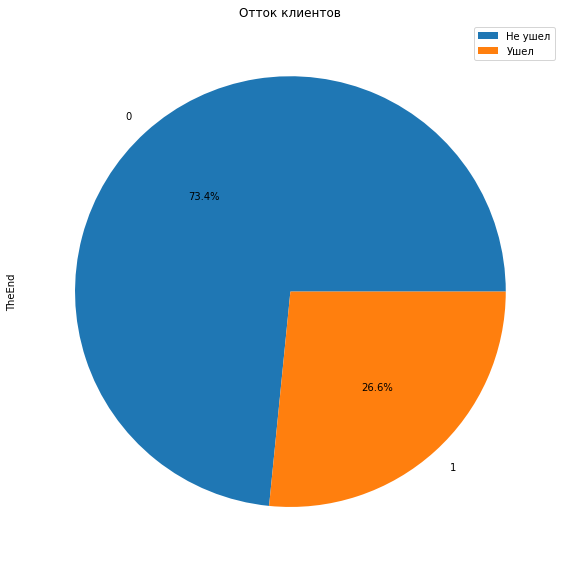

In [83]:
df['TheEnd'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(16,8))
plt.legend(['Не ушел', 'Ушел'])
plt.title('Отток клиентов')
plt.tight_layout()

Как видно по диаграмме, ушло более 1/4 клиентов, что является большим показателем. Посмотрим теперь по сумме дней:

In [84]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TheEnd,SumDays
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.850000,Female,0,1,0,0,DSL,0,1,0,0,0,0,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.500000,Male,0,0,0,0,DSL,1,0,1,0,0,0,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.150002,Male,0,0,0,0,DSL,1,1,0,0,0,0,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.750000,Male,0,0,0,0,DSL,1,0,1,1,0,0,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.649994,Female,0,0,0,0,Fiber optic,0,0,0,0,0,0,1,61


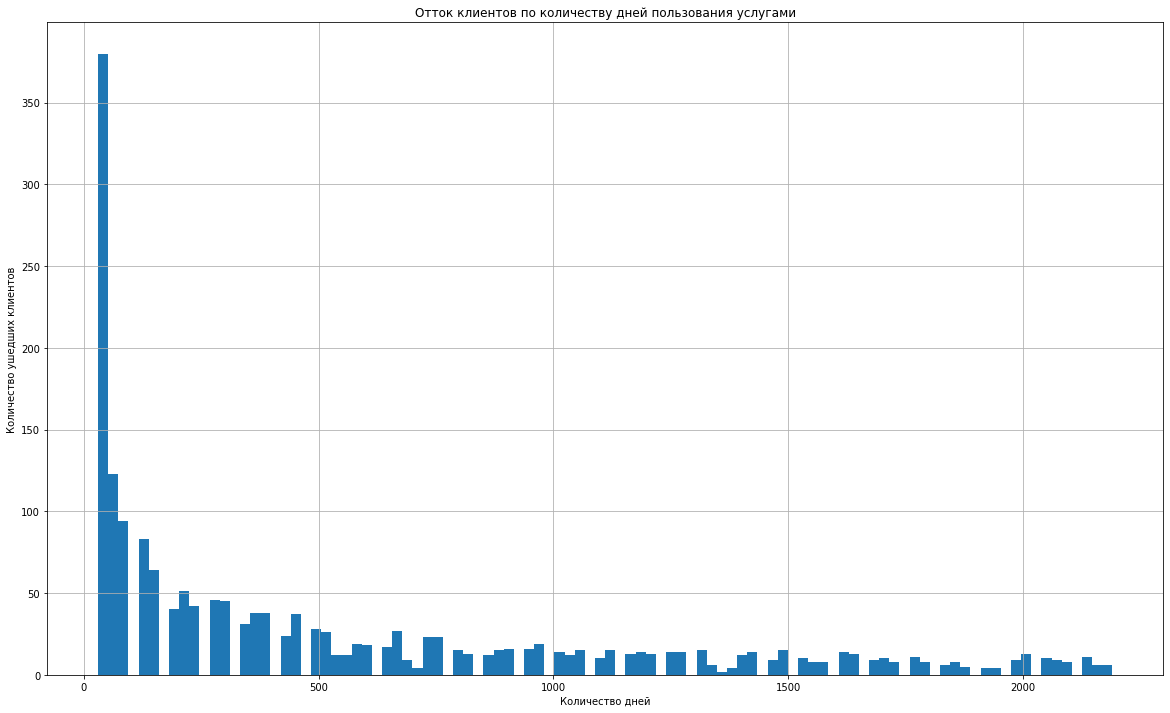

In [85]:
df.query('TheEnd == 1')['SumDays'].plot(kind='hist', bins=100, grid=True, figsize=(20,12))
plt.title('Отток клиентов по количеству дней пользования услугами')
plt.xlabel('Количество дней')
plt.ylabel('Количество ушедших клиентов')
plt.show()

Как видно из графика, быстрее всех уходят те, кто пользуется услугами не более 2-3 месяцев, вероятно, тариф им не подошел и они решили сменить поставщика услуг. Посмотрим теперь к привязке к типу оплаты:

In [86]:
df['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [87]:
df.groupby('Type')['Type'].count()

Type
Month-to-month    3875
One year          1472
Two year          1685
Name: Type, dtype: int64

In [88]:
df['Type'].value_counts().div(len(df)).mul(100)

Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: Type, dtype: float64

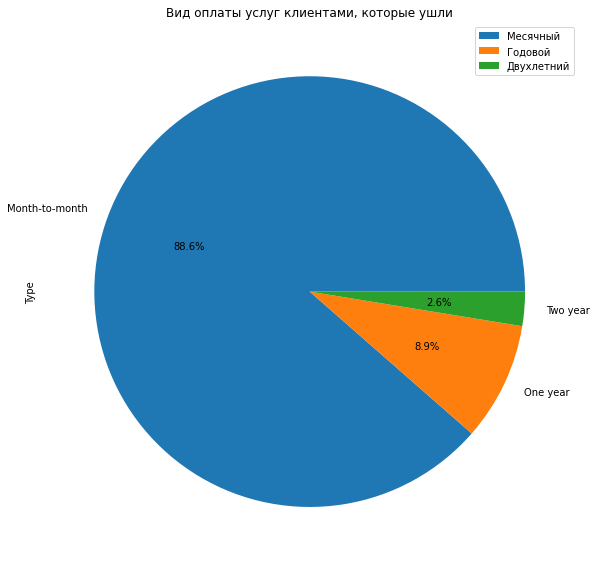

In [89]:
df.query('TheEnd == 1')['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(16,8))
plt.legend(['Месячный', 'Годовой', 'Двухлетний'])
plt.title('Вид оплаты услуг клиентами, которые ушли')
plt.tight_layout()

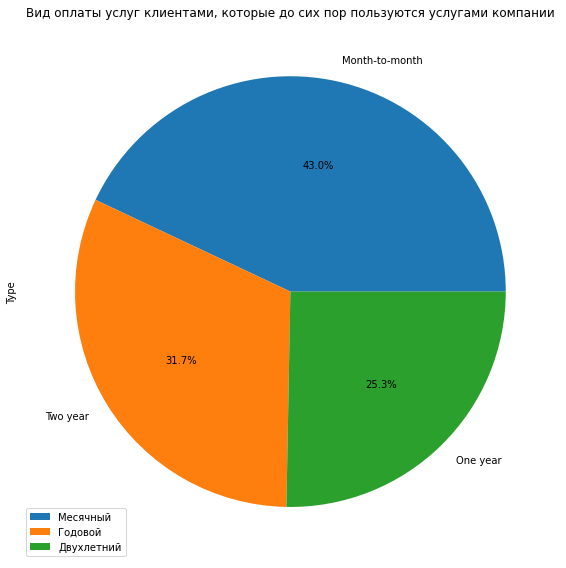

In [90]:
df.query('TheEnd == 0')['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(16,8))
plt.legend(['Месячный', 'Годовой', 'Двухлетний'])
plt.title('Вид оплаты услуг клиентами, которые до сих пор пользуются услугами компании')
plt.tight_layout()

Как видно по графику, почти 89 процентов клиентов которые перестают пользоваться услугами, находятся на оплате услуг помесячно. При этом постоянный клиенты преимущественно выбирают долгосрочные типы оплат (и это при условии что 55 процентов клиентов выбирают помесячную оплату). Возможно это хорошая идея для маркетинга привлечь клиентов, которые будут готовы оплатить сразу услуги за год или два.

Удалим столбцы с датами и ай ди которые не нужны для обучения модели. Для начала посмотрим на корреляцию признаков:

In [91]:
df_corr = df[['MonthlyCharges', 'TotalCharges', 'SumDays']]

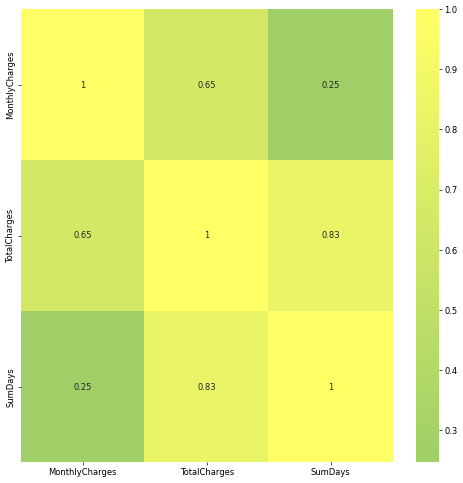

In [92]:
plt.figure(figsize=(10,10), dpi= 60)
sns.heatmap(df_corr.corr(), center=0, annot=True, cmap='summer')

Большая корреляция между количеством дней пользования услугами и оплаченых средств, что логично: чем дольше клиент, тем больше денег заплатил. В остальном критического ничего нет, целевой признак ни с чем не коррелирует. Думаю, лучше один признак удалить.

Теперь удалим три столбца с датами и айти клиентов, т.к. для обучения данная информация не имеет ценности. и так же сильно коррелирующий признак TotalCharges лучше удалить.

In [93]:
df = df.drop(columns=['customerID', 'BeginDate', 'EndDate', 'TotalCharges'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   int64  
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   gender            7032 non-null   object 
 5   SeniorCitizen     7032 non-null   int64  
 6   Partner           7032 non-null   int64  
 7   Dependents        7032 non-null   int64  
 8   MultipleLines     7032 non-null   int64  
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   int64  
 11  OnlineBackup      7032 non-null   int64  
 12  DeviceProtection  7032 non-null   int64  
 13  TechSupport       7032 non-null   int64  
 14  StreamingTV       7032 non-null   int64  
 15  StreamingMovies   7032 non-null   int64  
 16  TheEnd            7032 non-null   int64  


### ВЫВОД: 
В данном разделе мы изучили данные, частично подготовили их для машинного обучения и проанализировали возможные причины оттока клиентов. 

Для начала я объединила таблицы по айди, далее получившиеся пропуски в услугах заполнила'No', т.к. если у клиента нет данной информации, то логично, что данными услугами он не пользовался.

Далее, для изменения типа данных в столбце с целевым признаком, я заменила аномальные пустые значения на Nan т.к. они не давали провести замену типа. Потом после замены типа я удалила строки с пустыми значениями. Сохранять их не стала, т.к. их количество незначительно (11 сток) и это новые клиенты, подписавшие договор в день выгрузки данных и еще не успевшие оплатить услуги (может они их и не оплатят?).

Для машинного обучения сразу заменила бинарные значения Yes/No в стобцах с услугами на числовые значения 1/0. После этого я перевела даты в формат дат и посчитала количество дней пользования услугами компании для каждого клиента.

После работы с данными я проанализировала возможные причины оттока клиентов от пользования услугами. Т.к. чаще всего уходят клиенты которые недавно пользуются услугами и выбирают помесячную оплату , то скорее всего их не устраивает соотношение цены/качества (отток значительный 25%). Вероятно надо решить вопрос с тарифами и бонусами для новичков, где будет выгодным подключение с годовой (2годовой) оплатой услуг. 

В конце после анализа были удалены столбцы с датами и айти клиентов, т.к. для обучения данная информация не имеет ценности.

## МО и подбор гиперпараметров

### Подготовка данных к машинному обучению

Теперь преобразуем категориальные признаки в численные с помощью техники прямого кодирования OHE:

In [95]:
df.head(2)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TheEnd,SumDays
0,Month-to-month,1,Electronic check,29.85,Female,0,1,0,0,DSL,0,1,0,0,0,0,0,31
1,One year,0,Mailed check,56.95,Male,0,0,0,0,DSL,1,0,1,0,0,0,0,1036


In [96]:
df['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [97]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [98]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [99]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [100]:
df_new = pd.get_dummies(df, columns=['Type', 'PaymentMethod', 'gender', 'InternetService'])

In [101]:
df_new.head()

,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TheEnd,SumDays,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,29.85,0,1,0,0,0,1,0,0,0,0,0,31,1,0,0,0,0,1,0,1,0,1,0,0
1,0,56.95,0,0,0,0,1,0,1,0,0,0,0,1036,0,1,0,0,0,0,1,0,1,1,0,0
2,1,53.85,0,0,0,0,1,1,0,0,0,0,1,61,1,0,0,0,0,0,1,0,1,1,0,0
3,0,42.30,0,0,0,0,1,0,1,1,0,0,0,1371,0,1,0,1,0,0,0,0,1,1,0,0
4,1,70.70,0,0,0,0,0,0,0,0,0,0,1,61,1,0,0,0,0,1,0,1,0,0,1,0


Теперь разобьем данные на признаки и целевой признак, а так же на обучающую и тестовую выборки:

In [102]:
df_new['TheEnd'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: TheEnd, dtype: float64

In [103]:
target = df_new['TheEnd']
features = df_new.drop('TheEnd', axis=1)

In [104]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, 
                                                                            random_state = 120922, 
                                                                            stratify = target)

In [105]:
print(features_train.shape, 
      features_test.shape, 
      target_train.shape, 
      target_test.shape)

(5274, 25) (1758, 25) (5274,) (1758,)


### LGBMClassifier

Напишем для lgbm модели пайплайн и пропустим через GridSearchCV, потом прогоним через кросс-валидацию:

In [106]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('lgbm', LGBMClassifier(random_state=120922, objective='binary',
                                               class_weight='balanced', silent=True))])

In [107]:
params = {
 'lgbm__max_depth': range (1, 21, 2),
 'lgbm__n_estimators': range (1, 1001, 100),
 'lgbm__learning_rate': [0.8]}

In [108]:
GS_lgbm = GridSearchCV(pipe, params, 
                       verbose=3, cv=8,
                       n_jobs=-1, scoring='roc_auc')

In [109]:
GS_lgbm.fit(features_train, target_train)

Fitting 8 folds for each of 100 candidates, totalling 800 fits


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lgbm',
                                        LGBMClassifier(class_weight='balanced',
                                                       objective='binary',
                                                       random_state=120922))]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.8],
                         'lgbm__max_depth': range(1, 21, 2),
                         'lgbm__n_estimators': range(1, 1001, 100)},
             scoring='roc_auc', verbose=3)

In [110]:
GS_lgbm.best_score_

0.8942736311983471

In [111]:
GS_lgbm.best_params_

{'lgbm__learning_rate': 0.8, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 101}

In [112]:
GS_lgbm.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('lgbm',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.8,
                                max_depth=3, n_estimators=101,
                                objective='binary', random_state=120922))])

Лучший рузультат практически 0.89 при параметрах: глубина: 3, число деревьев 101

### RandomForestClassifier

Теперь попробуем обучить модель Случайного леса, воспользуемся GridSearch.

In [113]:
params_rfc = {
 'max_depth': range (1, 16, 3),
 'n_estimators': range (1, 501, 50),
 'random_state': [120922]}

In [114]:
GS_rfc = GridSearchCV(RandomForestClassifier(), 
                      params_rfc, verbose=3, cv=8,
                      n_jobs=-1, scoring='roc_auc')

In [115]:
GS_rfc.fit(features_train, target_train)

Fitting 8 folds for each of 50 candidates, totalling 400 fits


GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 16, 3),
                         'n_estimators': range(1, 501, 50),
                         'random_state': [120922]},
             scoring='roc_auc', verbose=3)

In [116]:
GS_rfc.best_score_

0.859845791798594

In [117]:
GS_rfc.best_params_

{'max_depth': 7, 'n_estimators': 401, 'random_state': 120922}

In [118]:
GS_rfc.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=401, random_state=120922)

Результаты auc_roc у модели случайный лес равен 0.86 при глубине 7 и количестве деревьев 401.

### Тестироование лучшей модели

Проверим модель lgbm, так как она показала лучший результат:

In [119]:
print('ROC-AUC : {:.2f}'.format(roc_auc_score(target_test,
                                              GS_lgbm.best_estimator_.predict_proba(features_test)[:, 1])))

ROC-AUC : 0.90


Результат на тестовой выборке auc_roc почти 0.89, что вполне неплохо. Далее дополнительно проверим результат предсказаний на другой метрике Accuracy:

In [120]:
print('Accuracy : {:.2%}'.format(accuracy_score(target_test,
                                                GS_lgbm.best_estimator_.predict(features_test))))

Accuracy : 82.25%


Результат Accuracy почти 80, результат средний, но так как основная метрика ROC-AUC, то данный результат удовлетворителен. 

### Вывод

В данном разделе была проведена подготовка данных к машинному обучению:

  - преобразование категориальных признаков в численные с помощью техники прямого кодирования OHE;

  - разобивка данных на признаки и целевой признак, а так же на обучающую и тестовую выборки;

Далее были обучены две модели:

  - LGBMClassifier сначала через паплайн с масштабированием и подбором параметров через GridSearchCV, далее с лучшими параметрами (глубина: 3, число деревьев 101, auc_roc 0.89) обучили модель и получили лучший результат с помощью кросс-валидации. 

  - RandomForestClassifier в простом варианте через цикл подобрали лучшие параметры и запустили через кросс-валидацию. Лучший результат auc_roc был при параметрах глубина 7 и  n_estimators равное 401 и равен почти 0.86. Что хуже , чем результат на LGBM модели. Поэтому проверку тестовой части данных провели на LGBM модели.

  - Провели тестирование на LGBM модели. Результаты на тестовой выборке auc_roc ˜0.90, а метрика Accuracy показала результат 0.82.

Результаты на тестовой выборке удовлетворительные. 

## Отчет о проделанной работе

В данном проекте были проведены работы поэтапно согласно составленному плану без отступлений. Основная трудность была в ожидании расчетов на GridSearch, так как даже с GPU расчеты велись долго. В остальном проблем ни с подготовокой данных, ни с обучением модели, не наблюдалось. 

В данной работе были следующие ключевые шаги :

    - подготовка данных и работа с аномалиями
    - создание дополнительных признаков;
    - исследование данных и анализ влияния признаков на целевой признак (причины оттока клиентов);
    - подготовка признаков и целевого признака для МО;
    - обучение моделей и поиск наилучшей;
    - тестирование лучшей модели.

Теперь подробнее рассмотрим каждый пункт выполненного плана:

1. Подготовка к проекту:

Была произведена загрузка данных, проверка файлов на их работоспособность и отсутствие багов, а так же их визуальный осмотр.
Проблем с открытием файлов данных нет.


2. Исследование данных:

В данном разделе была загружена краткая статистическая сводка данных, далее данные проверили на наличие явных дубликатов и пропусков, коих не оказалось.
Но при объединении таблиц пропуски появятся дальше по ходу выполнения проекта, поэтому вся работа с ними будет проведена дальше.
У столбца total charges так же надо будет изменить тип данных на float. Столбец EndDate в таком виде не подходит для работы и его надо будет заменить на бинарный вариант ответа 1/0 (ушел/не ушел).

3. Проработка данных и подготовка к МО:

Для начала были объеденены таблицы по номеру ID, появились пропуски там, где клиенты не пользовались какими либо услугами. Решено было заменить эти пропуски на "No". .

Далее при попытке замены типа данных у столбца "total charges", выяснилось, что там имеются другие аномалии в виде пустых строк, поэтому для начала было принято решение удалить эти строки, т.к. их количество равно 11 и не критично для всего датасета, а так же это были те клиенты, которые только заключили договор и не успели заплатить за услуги и их дальнейшее поведение достаточно сложно идентифицировать (совершенно не ясно какими в итоге клиентами они станут, поэтому считаю их не информативными).

Поэтому для начала были преобразованы все эти анамальные ячейки, которые невозможно было преобразовать в числовые значения, в NaN. Потом был изменен тип данных на float и в итоге были удалены строки с пропусками.

В итоге после всех этих действий в датасете осталось 7032 строк (для проверки количества сток была запущена команда shape).

Далее данном этапе целевой признак был разбит на бинарный вариант Ушел ли клиент" - "да" или "нет" посредством создания функции.
Далее все столбцы с бинарными ответами "Да" или "Нет" через эту же функцию были переведены к значению 1 или 0. На данном эпате все бинарные значения были преобразованы.
Так же на этом этапе была добавлена колонка, которая содержит информацию по количеству часов сколько врмени клиент пользуется или пользовался услугами данной компании. 

На следующем шаге был проведен анализ и выяснено какие клиенты чаще уходят: те, кто давно польтуется услугами или новички. 
Сначала был изменен тип данных у дат. Для этого в столбце с датой окончания заменены ответы "No" на дату "2020-02-01", что бы потом у столбца поменять тип данных и в итоге посчитать время пользования услугами.
После замены типа данных были посчитаны часы и результат был занесен в отдельный столбец "SumDays".
После этого были изучены данные и был проведен анализ что бы решить что повлияло на отток клиентов.
По графику видно, что ушло более 1/4 клиентов (26%), что является большим показателем. 
По сумме дней видно из графика, быстрее всех уходят те, кто пользуется услугами не более 2-3 месяцев, вероятно, тариф им не подошел и они решили сменить поставщика услуг. 
Посмотрев данные к привязке к типу оплаты видно по графику, что почти 89 процентов клиентов которые перестают пользоваться услугами, находятся на оплате услуг помесячно. При этом постоянные клиенты преимущественно выбирают долгосрочные типы оплат (и это при условии что 55 процентов клиентов выбирают помесячную оплату). Скорее всего это хорошая идея для маркетинга привлечь клиентов, которые будут готовы оплатить сразу услуги за год или два.

После анализа была изучена корреляция линейных признаков:

выявилась большая корреляция между количеством дней пользования услугами и оплаченых средств, что логично: чем дольше клиент пользуется услугами, тем больше денег заплатил компании. В остальном критического ничего нет, целевой признак ни с чем не коррелирует. Поэтому было принято решение один коррелирующий признак удалить.

После анализа были удалены столбцы с датой начала контракта "BeginDate", датой окончания "EndDate" (если контракт разорван или отметка "No") и столбец "customerID", т.к. для обучения данная информация не имеет ценности. И так же сильно коррелирующий признак "TotalCharges" был удален. 

4. МО и подбор гиперпараметров:

В данном разделе для начала были преобразованы категориальные признаки в численные с помощью техники прямого кодирования OHE.

После преобразования были разобиты данные на признаки и целевой признак, а так же на обучающую и тестовую выборки.

После подготовки и разбивки данных для lgbm-модели был создан пайплайн с маштабированием, который в итоге был добавлен в GridSearchCV. После расчетов были получены следующие результаты: лучший рузультат практически ROC-AUC = 0.89 при параметрах глубины = 3 и число деревьев = 101.

Следующая модель для обучения была выбрана модель Случайного леса, которая так же была использована посредством расчета через GridSearch.

После расчетов были получены следующие результаты: лучший рузультат практически ROC-AUC = 0.86 при глубине = 7 и количестве деревьев = 401.

Следующим шагом было тестироование лучшей модели.
Лучшее результаты показала модель lgbm, поэтому тестирование было проведено с ней. Для тестирования были взяты лучшие параметры GS_lgbm.best_estimator_ .
В итоге результат на тестовой выборке ROC-AUC  был равен 0.90, что вполне неплохо. 
Далее дополнительно была проверен результат предсказаний на другой метрике Accuracy. И результат Accuracy был равен почти 82, результат средний, но так как основная метрика ROC-AUC, то данный результат удовлетворителен. Модель не переучена. 

5. Подготовка отчета, выводов.

По каждому этапу были написаны выводы и так же в конце создан данный отчет. 

В целом, по проделанной работе , можно рекомендовать заказчику LGBMClassifier - модель, так как она показала лучшие результаты на тестовой выборке ROC-AUC = 0.90 и Accuracy = 82%. Она несомненно дольше проходит обучение и может переобучаться, поэтому необходим контроль, но зато у нее высокие показатели предсказывания событий.